In [311]:
import numpy as np
import pandas as pd
import seaborn as snc

In [312]:
df_train = pd.read_csv("D:/playground-series-s3e19/train.csv")
df_test = pd.read_csv("D:/playground-series-s3e19/test.csv")

In [313]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [314]:
df_train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [315]:
df_train.head(7)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98


<Axes: >

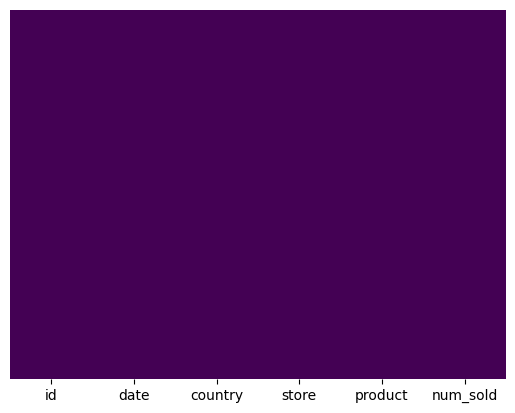

In [316]:
snc.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [317]:
from datetime import datetime
Date= []
for i in df_train['date']:
    Date.append(datetime.strptime(i,'%Y-%m-%d'))
df_train.dtypes

id           int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [318]:
date=pd.Series(Date)
df_train['date']=pd.to_numeric(date)

In [319]:
df_train['date']=df_train['date'].astype(float)
df_train.dtypes

id            int64
date        float64
country      object
store        object
product      object
num_sold      int64
dtype: object

In [320]:
X = df_train[['id', 'date', 'country', 'store', 'product']]
y = df_train[['num_sold']]

In [321]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X =X.apply(LabelEncoder().fit_transform)

In [322]:
X.head(-4)

,id,date,country,store,product
0,0,0,0,1,0
1,1,0,0,1,1
2,2,0,0,1,2
3,3,0,0,1,3
4,4,0,0,1,4
...,...,...,...,...,...
136941,136941,1825,4,2,1
136942,136942,1825,4,2,2
136943,136943,1825,4,2,3
136944,136944,1825,4,2,4


In [323]:
y.head()

,num_sold
0,63
1,66
2,9
3,59
4,49


In [324]:
# snc.pairplot(df_train[['id', 'date', 'country', 'store', 'product', 'num_sold']]) 

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [326]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=25)
regressor_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [327]:
y_pred_xgb = regressor_xgb.predict(X_test)

In [348]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xgb)

0.9893669722649759

In [329]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = regressor_xgb, X = X_train, y = y_train, cv = 1000)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [330]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision_tree = DecisionTreeRegressor(random_state = 0)
regressor_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [331]:
y_pred_decision_tree = regressor_decision_tree.predict(X_test)

In [332]:
print(y_pred_decision_tree)

[130. 102. 172. ... 339. 494.  92.]


In [333]:
r2_score(y_test, y_pred_decision_tree)

0.9775465602716666

In [334]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [335]:
df_test.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [336]:
df_test.duplicated().sum()

0

In [337]:
Date_= []
for i in df_test['date']:
    Date_.append(datetime.strptime(i,'%Y-%m-%d'))
df_test.dtypes

id          int64
date       object
country    object
store      object
product    object
dtype: object

In [338]:
date=pd.Series(Date_)
df_test['date']=pd.to_numeric(date)

In [339]:
df_test['date']=df_test['date'].astype(float)
df_test.dtypes

id           int64
date       float64
country     object
store       object
product     object
dtype: object

In [340]:
training = df_test[['id', 'date', 'country', 'store', 'product']]
training =training.apply(LabelEncoder().fit_transform)

In [341]:
training.head()

,id,date,country,store,product
0,0,0,0,1,0
1,1,0,0,1,1
2,2,0,0,1,2
3,3,0,0,1,3
4,4,0,0,1,4


In [342]:
result = regressor_xgb.predict(training)
print(result)

[ 61.546852  65.95412    9.092197 ... 113.89399  633.30756  587.5236  ]


In [343]:
# df_test['id'] = df_test['id'].astype(str)
# print(df_test['id'])
col = df_test[['id']]
result = np.array(result)
result = np.concatenate((col, result.reshape(-1, 1)), axis=1)
# result[:,0] = result[:,0].astype(str)

In [344]:
# result[:,0] = result[:,0].astype(int)
# print(result)

In [346]:
_data_ = result.astype(int)
df = pd.DataFrame(_data_, columns=['id', 'num_sold'])
df.info()
df.to_csv('output_playground.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        27375 non-null  int32
 1   num_sold  27375 non-null  int32
dtypes: int32(2)
memory usage: 214.0 KB
